In [23]:
# Imports
import numpy as np 
import networkx as nx
from networkx import karate_club_graph, to_numpy_matrix

In [24]:
G= karate_club_graph()
order = sorted(list(G.nodes()))

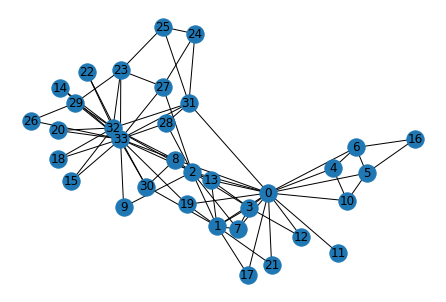

In [25]:
nx.draw(G, with_labels=True)

In [26]:
A = nx.to_numpy_matrix(G, nodelist=order)

In [27]:
A

matrix([[0., 1., 1., ..., 1., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 1., 0.],
        ...,
        [1., 0., 0., ..., 0., 1., 1.],
        [0., 0., 1., ..., 1., 0., 1.],
        [0., 0., 0., ..., 1., 1., 0.]])

In [28]:
I = np.eye(G.number_of_nodes())

In [29]:
I

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [30]:
A_own = A + I
A_own

matrix([[1., 1., 1., ..., 1., 0., 0.],
        [1., 1., 1., ..., 0., 0., 0.],
        [1., 1., 1., ..., 0., 1., 0.],
        ...,
        [1., 0., 0., ..., 1., 1., 1.],
        [0., 0., 1., ..., 1., 1., 1.],
        [0., 0., 0., ..., 1., 1., 1.]])

In [31]:
D_own = np.array(np.sum(A_own, axis=0))[0]
D_own

array([17., 10., 11.,  7.,  4.,  5.,  5.,  5.,  6.,  3.,  4.,  2.,  3.,
        6.,  3.,  3.,  3.,  3.,  3.,  4.,  3.,  3.,  3.,  6.,  4.,  4.,
        3.,  5.,  4.,  5.,  5.,  7., 13., 18.])

In [32]:
D_inv=D_own**-1
D_inv

array([0.05882353, 0.1       , 0.09090909, 0.14285714, 0.25      ,
       0.2       , 0.2       , 0.2       , 0.16666667, 0.33333333,
       0.25      , 0.5       , 0.33333333, 0.16666667, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.25      ,
       0.33333333, 0.33333333, 0.33333333, 0.16666667, 0.25      ,
       0.25      , 0.33333333, 0.2       , 0.25      , 0.2       ,
       0.2       , 0.14285714, 0.07692308, 0.05555556])

In [33]:
D_inv = np.matrix(np.diag(D_inv))
D_inv

matrix([[0.05882353, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.1       , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.09090909, ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.14285714, 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.07692308,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.05555556]])

In [34]:
D_inv.shape

(34, 34)

In [35]:
W1 = np.random.normal(loc=0, scale=1, size=(G.number_of_nodes(), 4))
W1

array([[-1.05411693e-02,  1.06144203e-01, -1.79789916e-01,
         1.76392909e+00],
       [-2.12823514e-01,  6.53826696e-01, -5.58065604e-01,
         1.12942423e+00],
       [-9.72424731e-01, -8.78248037e-01, -5.99195725e-01,
         6.03867485e-01],
       [-9.88616838e-01, -7.47023791e-02, -1.12242024e+00,
         5.05385436e-01],
       [-4.58893464e-01,  1.56387353e-01,  7.33915958e-01,
        -8.04281640e-01],
       [ 5.40880178e-01, -3.15472330e-01, -1.06055424e-01,
         1.80659902e-01],
       [-9.10759840e-01, -1.10229095e-01, -1.84470696e+00,
         1.67278478e+00],
       [ 1.23812584e+00, -1.55831555e+00,  4.55328127e-03,
         4.84894787e-01],
       [-1.78050093e+00,  2.30468009e-01,  3.91721288e-01,
         4.08506156e-01],
       [-1.40013843e+00, -3.95799549e-01,  1.77742177e+00,
        -2.24836294e-01],
       [ 1.04271465e-01,  6.67601607e-01,  3.88952573e-01,
        -5.84974496e-01],
       [-1.81881776e+00,  1.10540059e+00, -7.15389296e-02,
      

In [36]:
W1.shape[1]

4

In [37]:
W2 = np.random.normal(loc=0, size=(W1.shape[1], 2))
W2

array([[-0.37209769, -0.72834263],
       [-0.63675371,  1.33868811],
       [ 1.13814633,  1.48397983],
       [-0.08854238, -0.86709425]])

In [38]:
def gcn_layer(A, D, X, W):
    feature=D * A * X * W
    feature=np.maximum(0,feature)
    return feature

In [39]:
H1 = gcn_layer(A_own, D_inv, I, W1)

In [40]:
H1

matrix([[0.        , 0.01914896, 0.        , 0.35490831],
        [0.        , 0.        , 0.        , 0.61765637],
        [0.        , 0.        , 0.29464854, 0.39006164],
        [0.        , 0.        , 0.        , 0.41616013],
        [0.        , 0.20497602, 0.        , 0.51186443],
        [0.        , 0.        , 0.        , 0.70184038],
        [0.        , 0.        , 0.        , 0.65797895],
        [0.        , 0.        , 0.        , 0.89750021],
        [0.        , 0.        , 0.16283366, 0.84930178],
        [0.        , 0.        , 0.44337756, 0.76921811],
        [0.04392925, 0.15366521, 0.2092558 , 0.13883321],
        [0.        , 0.6057724 , 0.        , 0.92716756],
        [0.        , 0.055739  , 0.        , 0.38938596],
        [0.        , 0.        , 0.        , 0.90966765],
        [0.        , 0.        , 0.49489721, 1.1840911 ],
        [0.        , 0.31703169, 0.14629533, 1.23495577],
        [0.        , 0.        , 0.        , 0.7767491 ],
        [0.   

In [41]:
H2 = gcn_layer(A_own, D_inv, H1, W2)
H2

matrix([[0.        , 0.        ],
        [0.        , 0.        ],
        [0.08002261, 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.01723904, 0.        ],
        [0.15372156, 0.        ],
        [0.33551784, 0.05784099],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.05905585, 0.        ],
        [0.26968398, 0.        ],
        [0.06863907, 0.        ],
        [0.        , 0.        ],
        [0.        , 0.        ],
        [0.23669411, 0.        ],
        [0.        , 0.        ],
        [0.27586806, 0.        ],
        [0.        , 0.        ],
        [0.37620095, 0.12845348],
        [0.12341933, 0.        ],
        [0.2518714 , 0.3933109 ],
        [0.28077026, 0.36910315],
        [0.02289325, 0.        ],
        [0.1984797 , 0.0797208 ],
        [0.2942971 , 0.31556987],
        [0.051

In [42]:
output=H2

In [43]:
feature_representations = {
    node: np.array(output)[node] 
    for node in G.nodes()}

In [44]:
feature_representations

{0: array([0., 0.]),
 1: array([0., 0.]),
 2: array([0.08002261, 0.        ]),
 3: array([0., 0.]),
 4: array([0., 0.]),
 5: array([0., 0.]),
 6: array([0., 0.]),
 7: array([0.01723904, 0.        ]),
 8: array([0.15372156, 0.        ]),
 9: array([0.33551784, 0.05784099]),
 10: array([0., 0.]),
 11: array([0., 0.]),
 12: array([0., 0.]),
 13: array([0.05905585, 0.        ]),
 14: array([0.26968398, 0.        ]),
 15: array([0.06863907, 0.        ]),
 16: array([0., 0.]),
 17: array([0., 0.]),
 18: array([0.23669411, 0.        ]),
 19: array([0., 0.]),
 20: array([0.27586806, 0.        ]),
 21: array([0., 0.]),
 22: array([0.37620095, 0.12845348]),
 23: array([0.12341933, 0.        ]),
 24: array([0.2518714, 0.3933109]),
 25: array([0.28077026, 0.36910315]),
 26: array([0.02289325, 0.        ]),
 27: array([0.1984797, 0.0797208]),
 28: array([0.2942971 , 0.31556987]),
 29: array([0.05191741, 0.        ]),
 30: array([0.12208841, 0.        ]),
 31: array([0.22474753, 0.28699932]),
 32: a